# Pré-processamento dos Dados

## Objetivos

Realizar o Pré-processamento e Limpeza dos Dados, isso inclui:
- Unificar os arquivos `'csv'` dos conjuntos de dados `CIC-IDS 2017` e `CIC-IDS 2018` em um único **Dataframe**;
- Realizar a `limpeza dos dados`;
- Tratar os valores `nulos` e `ausentes`;
- Remover valores `duplicados`;
- Tratamento de valores `categóricos`;
- Realizar a `análise inicial` dos dados obtidos;
- Tratamentos de `colunas`

## Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from datetime import datetime
import matplotlib.pyplot as plt

## Unificando os Datasets

### Dataset - 2017

In [3]:
path_2017 = r"C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS2017"

In [6]:
dados_2017 = [os.path.join(path_2017, f) for f in os.listdir(path_2017) if f.endswith(".csv")]

print("\nArquivos Encontrados:")
for i, arquivo in enumerate(dados_2017, start=1):
    print(f"{i}. {arquivo}")

for i, arquivo in enumerate(dados_2017, start=1):
    df = pd.read_csv(arquivo)
    linhas, colunas = df.shape
    print(f"Arquivo {i}: {linhas} linhas e {colunas} colunas")


Arquivos Encontrados:
1. C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS2017\Friday-WorkingHours-Afternoon-DDos.csv
2. C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS2017\Friday-WorkingHours-Afternoon-PortScan.csv
3. C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS2017\Friday-WorkingHours-Morning.csv
4. C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS2017\Monday-WorkingHours.csv
5. C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS2017\Thursday-WorkingHours-Afternoon-Infilteration.csv
6. C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS2017\Thursday-WorkingHours-Morning-WebAttacks.csv
7. C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS2017\Tuesday-WorkingHours.csv
8. C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS2017\Wednesday-workingHours.csv
Arquivo 1: 225745 linhas e 79 colunas
Arquivo 2: 286467 linhas e 79 colunas
Arquivo 3: 191033 linhas e 79 colunas
Arquivo 4: 529918 linhas e

In [7]:
dataframes_2017 = []

for i in dados_2017:
    df = pd.read_csv(i)
    dataframes_2017.append(df)

# Concatenar todos os DataFrames em um só
IDS_2017_COMPLETO = pd.concat(dataframes_2017)
linhas, colunas = IDS_2017_COMPLETO.shape

print(f'Linhas: {linhas}')
print(f'Colunas: {colunas}')
print(f'Células: {linhas * colunas}')

Linhas: 2830743
Colunas: 79
Células: 223628697


In [9]:
# Limpando a memória (Removendo todos os dataframes da lista)
for j in dataframes_2017: del j

In [10]:
#Caminho de saída para o novo CSV
path_2017_saida = r"C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS-2017-COMPLETO.csv"

#IDS_2017_COMPLETO.to_csv(path_2017_saida, index=False)
#print("Arquivo salvo em:", path_2017_saida)

In [11]:
#Criando e exibindo o novo dataframe
df_2017 = pd.read_csv(path_2017_saida)
df_2017.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [12]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

### Dataset - 2018

In [5]:
path_2018 = r"C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS2018"

In [7]:
dados_2018 = [os.path.join(path_2018, f) for f in os.listdir(path_2018) if f.endswith(".csv")]

print("\nArquivos Encontrados:")
for i, arquivo in enumerate(dados_2018, start=1):
    print(f"{i}. {arquivo}")

for i, arquivo in enumerate(dados_2018, start=1):
    df = pd.read_csv(arquivo, low_memory=False)
    linhas, colunas = df.shape
    print(f"Arquivo {i}: {linhas} linhas e {colunas} colunas")


Arquivos Encontrados:
1. C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS2018\02-14-2018.csv
2. C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS2018\02-15-2018.csv
3. C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS2018\02-16-2018.csv
4. C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS2018\02-21-2018.csv
5. C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS2018\02-22-2018.csv
6. C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS2018\02-23-2018.csv
7. C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS2018\02-28-2018.csv
8. C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS2018\03-01-2018.csv
9. C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS2018\03-02-2018.csv
Arquivo 1: 1048575 linhas e 80 colunas
Arquivo 2: 1048575 linhas e 80 colunas
Arquivo 3: 1048575 linhas e 80 colunas
Arquivo 4: 1048575 linhas e 80 colunas
Arquivo 5: 1048575 linhas e 80 colunas
Arquivo 6: 1048575 linhas 

In [3]:
#dataframes_2018 = []

#for i in dados_2018:
#    df = pd.read_csv(i)
#    dataframes_2018.append(df)

# Concatenar todos os DataFrames em um só
#IDS_2018_1_COMPLETO = pd.concat(dataframes_2018)
#linhas, colunas = IDS_2018_1_COMPLETO.shape

#IDS_2018_2_COMPLETO = pd.concat(dataframes_2018)
#linhas, colunas = IDS_2018_2_COMPLETO.shape

#IDS_2018_3_COMPLETO = pd.concat(dataframes_2018)
#linhas, colunas = IDS_2018_3_COMPLETO.shape

#print(f'Linhas: {linhas}')
#print(f'Colunas: {colunas}')
#print(f'Células: {linhas * colunas}')

In [8]:
# Limpando a memória (Removendo todos os dataframes da lista)
for j in dataframes_2018: del j

In [4]:
#Caminho de saída para o novo CSV
path_2018_1_saida = r"C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS-2018-1-COMPLETO.csv"
path_2018_2_saida = r"C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS-2018-2-COMPLETO.csv"
path_2018_3_saida = r"C:\Users\augus\Capstone-Data-Science-Project\dados\brutos\IDS-2018-3-COMPLETO.csv"

#IDS_2018_1_COMPLETO.to_csv(path_2018_1_saida, index=False)
#print("Arquivo salvo em:", path_2018_1_saida)

#IDS_2018_2_COMPLETO.to_csv(path_2018_2_saida, index=False)
#print("Arquivo salvo em:", path_2018_2_saida)

#IDS_2018_3_COMPLETO.to_csv(path_2018_3_saida, index=False)
#print("Arquivo salvo em:", path_2018_3_saida)

In [6]:
#Criando e exibindo o novo dataframe
df_2018_1 = pd.read_csv(path_2018_1_saida, low_memory=False)
df_2018_1.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [7]:
df_2018_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145725 entries, 0 to 3145724
Data columns (total 80 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Dst Port           object
 1   Protocol           object
 2   Timestamp          object
 3   Flow Duration      object
 4   Tot Fwd Pkts       object
 5   Tot Bwd Pkts       object
 6   TotLen Fwd Pkts    object
 7   TotLen Bwd Pkts    object
 8   Fwd Pkt Len Max    object
 9   Fwd Pkt Len Min    object
 10  Fwd Pkt Len Mean   object
 11  Fwd Pkt Len Std    object
 12  Bwd Pkt Len Max    object
 13  Bwd Pkt Len Min    object
 14  Bwd Pkt Len Mean   object
 15  Bwd Pkt Len Std    object
 16  Flow Byts/s        object
 17  Flow Pkts/s        object
 18  Flow IAT Mean      object
 19  Flow IAT Std       object
 20  Flow IAT Max       object
 21  Flow IAT Min       object
 22  Fwd IAT Tot        object
 23  Fwd IAT Mean       object
 24  Fwd IAT Std        object
 25  Fwd IAT Max        object
 26  Fwd IAT Min   

In [8]:
#Criando e exibindo o novo dataframe
df_2018_2 = pd.read_csv(path_2018_2_saida, low_memory=False)
df_2018_2.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [9]:
df_2018_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145725 entries, 0 to 3145724
Data columns (total 80 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int64  
 1   Protocol           int64  
 2   Timestamp          object 
 3   Flow Duration      int64  
 4   Tot Fwd Pkts       int64  
 5   Tot Bwd Pkts       int64  
 6   TotLen Fwd Pkts    int64  
 7   TotLen Bwd Pkts    int64  
 8   Fwd Pkt Len Max    int64  
 9   Fwd Pkt Len Min    int64  
 10  Fwd Pkt Len Mean   float64
 11  Fwd Pkt Len Std    float64
 12  Bwd Pkt Len Max    int64  
 13  Bwd Pkt Len Min    int64  
 14  Bwd Pkt Len Mean   float64
 15  Bwd Pkt Len Std    float64
 16  Flow Byts/s        float64
 17  Flow Pkts/s        float64
 18  Flow IAT Mean      float64
 19  Flow IAT Std       float64
 20  Flow IAT Max       int64  
 21  Flow IAT Min       int64  
 22  Fwd IAT Tot        int64  
 23  Fwd IAT Mean       float64
 24  Fwd IAT Std        float64
 25  Fwd IAT Max       

In [9]:
#Criando e exibindo o novo dataframe
df_2018_3 = pd.read_csv(path_2018_3_saida, low_memory=False)
df_2018_3.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [11]:
df_2018_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992804 entries, 0 to 1992803
Data columns (total 80 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Dst Port           object
 1   Protocol           object
 2   Timestamp          object
 3   Flow Duration      object
 4   Tot Fwd Pkts       object
 5   Tot Bwd Pkts       object
 6   TotLen Fwd Pkts    object
 7   TotLen Bwd Pkts    object
 8   Fwd Pkt Len Max    object
 9   Fwd Pkt Len Min    object
 10  Fwd Pkt Len Mean   object
 11  Fwd Pkt Len Std    object
 12  Bwd Pkt Len Max    object
 13  Bwd Pkt Len Min    object
 14  Bwd Pkt Len Mean   object
 15  Bwd Pkt Len Std    object
 16  Flow Byts/s        object
 17  Flow Pkts/s        object
 18  Flow IAT Mean      object
 19  Flow IAT Std       object
 20  Flow IAT Max       object
 21  Flow IAT Min       object
 22  Fwd IAT Tot        object
 23  Fwd IAT Mean       object
 24  Fwd IAT Std        object
 25  Fwd IAT Max        object
 26  Fwd IAT Min   

## Tratamento e Limpeza dos Dados

### Dataset - 2017

#### Visão Geral do Dataset

In [18]:
pd.options.display.max_rows = 80
df_2017.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-1.300000e+01,155.000000,31316.000000,3.204828e+06,1.200000e+08
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.000000e+00,2.000000,2.000000,5.000000e+00,2.197590e+05
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.000000e+00,1.000000,2.000000,4.000000e+00,2.919220e+05
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.000000e+00,12.000000,62.000000,1.870000e+02,1.290000e+07
Total Length of Bwd Packets,2830743.0,1.616264e+04,2.263088e+06,0.000000e+00,0.000000,123.000000,4.820000e+02,6.554530e+08
Fwd Packet Length Max,2830743.0,2.075999e+02,7.171848e+02,0.000000e+00,6.000000,37.000000,8.100000e+01,2.482000e+04
Fwd Packet Length Min,2830743.0,1.871366e+01,6.033935e+01,0.000000e+00,0.000000,2.000000,3.600000e+01,2.325000e+03
Fwd Packet Length Mean,2830743.0,5.820194e+01,1.860912e+02,0.000000e+00,6.000000,34.000000,5.000000e+01,5.940857e+03
Fwd Packet Length Std,2830743.0,6.891013e+01,2.811871e+02,0.000000e+00,0.000000,0.000000,2.616295e+01,7.125597e+03


#### Tratamento de colunas

In [19]:
df_2017.columns = df_2017.columns.str.strip()

In [20]:
df_2017.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

#### Tratamento de valores duplicados

In [24]:
valores_duplicados = df_2017.duplicated().sum()
print(f"Total de entradas duplicadas: {valores_duplicados}\n")

Total de entradas duplicadas: 308381



In [25]:
df_2017.drop_duplicates(inplace=True)

#### Tratamento de valores ausentes e infinitos

In [28]:
# Verificando valores ausentes
valores_ausentes = df_2017.isna().sum()
print(valores_ausentes.loc[valores_ausentes > 0])

Flow Bytes/s    353
dtype: int64


In [30]:
# Verificando valores infinitos
colunas_numericas = df_2017.select_dtypes(include = np.number).columns
valores_inf = np.isinf(df_2017[colunas_numericas]).sum()
print(valores_inf[valores_inf > 0])

Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64


In [32]:
# Substituindo valores ausentes por NaN
df_2017.replace([np.inf, -np.inf], np.nan, inplace = True)
print(f'Valores ausentes {df_2017.isna().sum().sum()}')

Valores ausentes 3128


In [34]:
# Verificando valores ausentes
valores_ausentes = df_2017.isna().sum()
print(valores_ausentes.loc[valores_ausentes > 0])

Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64


In [36]:
# Substituindo os valores ausentes pela Mediana da coluna 'Flow Bytes/s' e 'Flow Packets/s'

mediana_bytes = df_2017['Flow Bytes/s'].median()
mediana_packets = df_2017['Flow Packets/s'].median()

print(f'Mediana da coluna Flow Bytes/s: {mediana_bytes}')
print(f'Mediana da coluna Flow Packets/s: {mediana_packets}')

df_2017['Flow Bytes/s'] = df_2017['Flow Bytes/s'].fillna(mediana_bytes)
df_2017['Flow Packets/s'] = df_2017['Flow Packets/s'].fillna(mediana_packets)

print(f'Valores ausentes após tratamento: {df_2017['Flow Bytes/s'].isna().sum()}')
print(f'Valores ausentes após tratamento: {df_2017['Flow Packets/s'].isna().sum()}')

Mediana da coluna Flow Bytes/s: 3715.0378579999997
Mediana da coluna Flow Packets/s: 69.742244285
Valores ausentes após tratamento: 0
Valores ausentes após tratamento: 0


#### Tratamento da coluna categórica

In [38]:
df_2017['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [40]:
print(df_2017['Label'].value_counts())

Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [42]:
# Dicionário com todos os ataques e renomeando os mesmos para simplificar
ataques_2017 = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Criando nova coluna com base nos ataques existentes
df_2017['Tipos de Ataques'] = df_2017['Label'].map(ataques_2017)

In [44]:
df_2017['Tipos de Ataques'].value_counts()

Tipos de Ataques
BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [46]:
# Removendo coluna 'Label' uma vez que foi criada a coluna simplificada 'Tipos de Ataques'
df_2017.drop('Label', axis=1, inplace = True)

#### Proporção de Tráfego

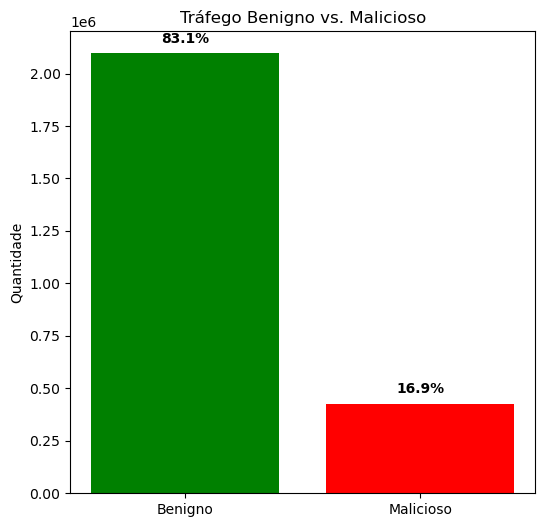

In [48]:
contagem_ataques = df_2017['Tipos de Ataques'].value_counts()
benigno = contagem_ataques.get('BENIGN', 0)
malicioso = contagem_ataques.sum() - benigno  
total = benigno + malicioso  

plt.figure(figsize=(6, 6))
plt.bar(['Benigno', 'Malicioso'], [benigno, malicioso], color=["green", "red"])

plt.title("Tráfego Benigno vs. Malicioso")
plt.ylabel("Quantidade")

for i, valor in enumerate([benigno, malicioso]):
    porcentagem = (valor / total) * 100
    plt.text(i, valor + total * 0.02, f'{porcentagem:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.show()

In [50]:
#Caminho de saída para o novo arquivo CSV após tratamento de nulos, duplicados e coluna categórica
novo_path_2017_saida = r"C:\Users\augus\Capstone-Data-Science-Project\dados\processados\IDS-2017-PROCESSADO.csv"

#Salvando o arquivo
df_2017.to_csv(novo_path_2017_saida, index=False)

print("Arquivo salvo em:", novo_path_2017_saida)

Arquivo salvo em: C:\Users\augus\Capstone-Data-Science-Project\dados\processados\IDS-2017-PROCESSADO.csv


### Dataset - 2018

#### Visão Geral dos Datasets

In [12]:
pd.options.display.max_rows = 80
df_2018_1.describe().transpose()

,count,unique,top,freq
Dst Port,3145725,34776,80,831867
Protocol,3145725,4,6,2562192
Timestamp,3145725,69083,16/02/2018 01:45:28,8403
Flow Duration,3145725,1198070,2,151326
Tot Fwd Pkts,3145725,1031,1,959991
Tot Bwd Pkts,3145725,1553,1,1037203
TotLen Fwd Pkts,3145725,9136,0,1316089
TotLen Bwd Pkts,3145725,30352,0,1455059
Fwd Pkt Len Max,3145725,1463,0,1316089
Fwd Pkt Len Min,3145725,163,0,2584624


In [13]:
pd.options.display.max_rows = 80
df_2018_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Dst Port,3145725.0,1.263639e+04,2.221121e+04,0.000000e+00,80.000000,80.000000,3.389000e+03,6.553400e+04
Protocol,3145725.0,8.043582e+00,4.398925e+00,0.000000e+00,6.000000,6.000000,6.000000e+00,1.700000e+01
Flow Duration,3145725.0,1.135389e+07,8.521689e+08,-8.282200e+11,1125.000000,11702.000000,2.072145e+06,1.200000e+08
Tot Fwd Pkts,3145725.0,7.004989e+01,2.831045e+03,1.000000e+00,2.000000,2.000000,5.000000e+00,3.096290e+05
Tot Bwd Pkts,3145725.0,6.487403e+00,2.156495e+02,0.000000e+00,0.000000,1.000000,4.000000e+00,1.231180e+05
TotLen Fwd Pkts,3145725.0,2.458806e+03,9.060567e+04,0.000000e+00,0.000000,45.000000,7.500000e+02,9.908128e+06
TotLen Bwd Pkts,3145725.0,5.782538e+03,3.061588e+05,0.000000e+00,0.000000,102.000000,3.620000e+02,1.563604e+08
Fwd Pkt Len Max,3145725.0,2.422620e+02,3.414119e+02,0.000000e+00,0.000000,41.000000,4.100000e+02,6.592000e+03
Fwd Pkt Len Min,3145725.0,8.503820e+00,2.460410e+01,0.000000e+00,0.000000,0.000000,0.000000e+00,1.460000e+03
Fwd Pkt Len Mean,3145725.0,5.683877e+01,6.851926e+01,0.000000e+00,0.000000,36.000000,1.023571e+02,1.809552e+03


In [14]:
pd.options.display.max_rows = 80
df_2018_3.describe().transpose()

,count,unique,top,freq
Dst Port,1992804,43611,53,512426
Protocol,1992804,4,6,1431107
Timestamp,1992804,95348,28/02/2018 01:48:05,3055
Flow Duration,1992804,690895,2,34170
Tot Fwd Pkts,1992804,926,1,588331
Tot Bwd Pkts,1992804,1282,1,666520
TotLen Fwd Pkts,1992804,8335,0,609174
TotLen Bwd Pkts,1992804,32720,0.0,385158
Fwd Pkt Len Max,1992804,1464,0,609174
Fwd Pkt Len Min,1992804,253,0,1454544


#### Tratamento de colunas

In [15]:
colunas_numericas = [
    'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
    'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
    'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Flow IAT Max', 'Flow IAT Min',
    'Fwd IAT Tot', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Max',
    'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
    'Fwd Header Len', 'Bwd Header Len', 'Pkt Len Min', 'Pkt Len Max', 'FIN Flag Cnt',
    'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
    'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
    'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg',
    'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
    'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min',
    'Active Max', 'Active Min', 'Idle Max', 'Idle Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
    'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std',
    'Fwd IAT Mean', 'Fwd IAT Std', 'Bwd IAT Mean', 'Bwd IAT Std', 'Fwd Pkts/s', 'Bwd Pkts/s',
    'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'Pkt Size Avg', 'Fwd Seg Size Avg',
    'Bwd Seg Size Avg', 'Active Mean', 'Active Std', 'Idle Mean', 'Idle Std'
]

df_2018_1[colunas_numericas] = df_2018_1[colunas_numericas].apply(pd.to_numeric, errors='coerce')
df_2018_3[colunas_numericas] = df_2018_3[colunas_numericas].apply(pd.to_numeric, errors='coerce')

In [16]:
df_2018_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145725 entries, 0 to 3145724
Data columns (total 80 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           float64
 1   Protocol           float64
 2   Timestamp          object 
 3   Flow Duration      float64
 4   Tot Fwd Pkts       float64
 5   Tot Bwd Pkts       float64
 6   TotLen Fwd Pkts    float64
 7   TotLen Bwd Pkts    float64
 8   Fwd Pkt Len Max    float64
 9   Fwd Pkt Len Min    float64
 10  Fwd Pkt Len Mean   float64
 11  Fwd Pkt Len Std    float64
 12  Bwd Pkt Len Max    float64
 13  Bwd Pkt Len Min    float64
 14  Bwd Pkt Len Mean   float64
 15  Bwd Pkt Len Std    float64
 16  Flow Byts/s        float64
 17  Flow Pkts/s        float64
 18  Flow IAT Mean      float64
 19  Flow IAT Std       float64
 20  Flow IAT Max       float64
 21  Flow IAT Min       float64
 22  Fwd IAT Tot        float64
 23  Fwd IAT Mean       float64
 24  Fwd IAT Std        float64
 25  Fwd IAT Max       

In [22]:
df_2018_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992804 entries, 0 to 1992803
Data columns (total 80 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           float64
 1   Protocol           float64
 2   Timestamp          object 
 3   Flow Duration      float64
 4   Tot Fwd Pkts       float64
 5   Tot Bwd Pkts       float64
 6   TotLen Fwd Pkts    float64
 7   TotLen Bwd Pkts    float64
 8   Fwd Pkt Len Max    float64
 9   Fwd Pkt Len Min    float64
 10  Fwd Pkt Len Mean   float64
 11  Fwd Pkt Len Std    float64
 12  Bwd Pkt Len Max    float64
 13  Bwd Pkt Len Min    float64
 14  Bwd Pkt Len Mean   float64
 15  Bwd Pkt Len Std    float64
 16  Flow Byts/s        float64
 17  Flow Pkts/s        float64
 18  Flow IAT Mean      float64
 19  Flow IAT Std       float64
 20  Flow IAT Max       float64
 21  Flow IAT Min       float64
 22  Fwd IAT Tot        float64
 23  Fwd IAT Mean       float64
 24  Fwd IAT Std        float64
 25  Fwd IAT Max       

#### Tratamento de valores duplicados

In [19]:
dados = {
    "IDS-2018-1-COMPLETO": df_2018_1,
    "IDS-2018-2-COMPLETO": df_2018_2,
    "IDS-2018-3-COMPLETO": df_2018_3
}

print("\nEntradas Duplicadas:\n")
for nome, df in dados.items():
    valores_duplicados = df.duplicated().sum()
    print(f"{nome}: {valores_duplicados}")


Entradas Duplicadas:

IDS-2018-1-COMPLETO: 375635
IDS-2018-2-COMPLETO: 23449
IDS-2018-3-COMPLETO: 11678


In [21]:
df_2018_1.drop_duplicates(inplace=True)
df_2018_2.drop_duplicates(inplace=True)
df_2018_3.drop_duplicates(inplace=True)

#### Tratamento de valores ausentes e infinitos

In [22]:
# Verificando valores ausentes
for nome, df in dados.items():
    valores_ausentes = df.isna().sum()
    print(f"\n{nome}:\n{valores_ausentes.loc[valores_ausentes > 0]}\n")


IDS-2018-1-COMPLETO:
Dst Port         1
Protocol         1
Flow Duration    1
Tot Fwd Pkts     1
Tot Bwd Pkts     1
                ..
Active Min       1
Idle Mean        1
Idle Std         1
Idle Max         1
Idle Min         1
Length: 78, dtype: int64


IDS-2018-2-COMPLETO:
Flow Byts/s    7318
dtype: int64


IDS-2018-3-COMPLETO:
Dst Port         1
Protocol         1
Flow Duration    1
Tot Fwd Pkts     1
Tot Bwd Pkts     1
                ..
Active Min       1
Idle Mean        1
Idle Std         1
Idle Max         1
Idle Min         1
Length: 78, dtype: int64



In [23]:
# Verificando valores infinitos
for nome, df in dados.items():
    colunas_numericas = df.select_dtypes(include = np.number).columns
    valores_inf = np.isinf(df[colunas_numericas]).sum()
    print(f'\n{nome}:\n{valores_inf[valores_inf > 0]}')


IDS-2018-1-COMPLETO:
Flow Byts/s     4645
Flow Pkts/s    11843
dtype: int64

IDS-2018-2-COMPLETO:
Flow Byts/s     3988
Flow Pkts/s    11306
dtype: int64

IDS-2018-3-COMPLETO:
Flow Byts/s     4686
Flow Pkts/s    11747
dtype: int64


In [27]:
# Substituindo valores ausentes por NaN
for nome, df in dados.items():
    df.replace([np.inf, -np.inf], np.nan, inplace = True)
    print(f'\n{nome}:\nValores ausentes {df.isna().sum().sum()}')


IDS-2018-1-COMPLETO:
Valores ausentes 23764

IDS-2018-2-COMPLETO:
Valores ausentes 22612

IDS-2018-3-COMPLETO:
Valores ausentes 23572


In [28]:
# Verificando valores ausentes
for nome, df in dados.items():
    valores_ausentes = df.isna().sum()
    print(f"\n{nome}: {valores_ausentes.loc[valores_ausentes > 0]}\n")


IDS-2018-1-COMPLETO: Dst Port         1
Protocol         1
Flow Duration    1
Tot Fwd Pkts     1
Tot Bwd Pkts     1
                ..
Active Min       1
Idle Mean        1
Idle Std         1
Idle Max         1
Idle Min         1
Length: 78, dtype: int64


IDS-2018-2-COMPLETO: Flow Byts/s    11306
Flow Pkts/s    11306
dtype: int64


IDS-2018-3-COMPLETO: Dst Port         1
Protocol         1
Flow Duration    1
Tot Fwd Pkts     1
Tot Bwd Pkts     1
                ..
Active Min       1
Idle Mean        1
Idle Std         1
Idle Max         1
Idle Min         1
Length: 78, dtype: int64



In [29]:
# Substituindo os valores ausentes pela Mediana da coluna 'Flow Bytes/s' e 'Flow Packets/s'
colunas = ['Flow Byts/s', 'Flow Pkts/s']

for nome, df in dados.items():
    mediana = df[colunas].median()
    print(f'\n{nome}:\nMediana das colunas:\n{mediana}')
    df[colunas] = df[colunas].fillna(mediana)

for nome, df in dados.items():
    print(f'\n{nome} - Valores ausentes após tratamento:\n')
    for i in colunas:
        print(f'{i}: {df[i].isna().sum()}')


IDS-2018-1-COMPLETO:
Mediana das colunas:
Flow Byts/s    294.394025
Flow Pkts/s     63.315183
dtype: float64

IDS-2018-2-COMPLETO:
Mediana das colunas:
Flow Byts/s    789.493778
Flow Pkts/s    367.511944
dtype: float64

IDS-2018-3-COMPLETO:
Mediana das colunas:
Flow Byts/s    1183.369346
Flow Pkts/s     617.556242
dtype: float64

IDS-2018-1-COMPLETO - Valores ausentes após tratamento:

Flow Byts/s: 0
Flow Pkts/s: 0

IDS-2018-2-COMPLETO - Valores ausentes após tratamento:

Flow Byts/s: 0
Flow Pkts/s: 0

IDS-2018-3-COMPLETO - Valores ausentes após tratamento:

Flow Byts/s: 0
Flow Pkts/s: 0


#### Tratamento da coluna categórica

In [33]:
# Removendo o valor 'Label' da coluna 'Label' pois não faz parte dos valores únicos
for nome, df in dados.items():
    df.drop(df[df['Label'] == 'Label'].index, inplace=True)
    print(f'\n{nome}:\n{df["Label"].unique()}')


IDS-2018-1-COMPLETO:
['Benign' 'FTP-BruteForce' 'SSH-Bruteforce' 'DoS attacks-GoldenEye'
 'DoS attacks-Slowloris' 'DoS attacks-SlowHTTPTest' 'DoS attacks-Hulk']

IDS-2018-2-COMPLETO:
['Benign' 'DDOS attack-LOIC-UDP' 'DDOS attack-HOIC' 'Brute Force -Web'
 'Brute Force -XSS' 'SQL Injection']

IDS-2018-3-COMPLETO:
['Benign' 'Infilteration' 'Bot']


In [34]:
for nome, df in dados.items():
    print(f'\n{nome}:\n{df['Label'].value_counts()}')


IDS-2018-1-COMPLETO:
Label
Benign                      2107340
DoS attacks-Hulk             434873
SSH-Bruteforce               117322
DoS attacks-GoldenEye         41455
FTP-BruteForce                39352
DoS attacks-SlowHTTPTest      19462
DoS attacks-Slowloris         10285
Name: count, dtype: int64

IDS-2018-2-COMPLETO:
Label
Benign                  2451157
DDOS attack-HOIC         668461
DDOS attack-LOIC-UDP       1730
Brute Force -Web            611
Brute Force -XSS            230
SQL Injection                87
Name: count, dtype: int64

IDS-2018-3-COMPLETO:
Label
Benign           1536918
Bot               282310
Infilteration     161897
Name: count, dtype: int64


In [37]:
# Dicionário com todos os ataques e renomeando os mesmos para simplificar
ataques_2018_1 = {
    'Benign': 'Benign',
    'DoS attacks-Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS attacks-SlowHTTPTest': 'DoS',
    'DoS attacks-Slowloris': 'DoS',
    'FTP-BruteForce': 'Brute Force',
    'SSH-Bruteforce': 'Brute Force'
}

ataques_2018_2 = {
    'Benign': 'Benign',
    'DDOS attack-HOIC': 'DDoS',
    'DDOS attack-LOIC-UDP': 'DDoS',
    'Brute Force -Web': 'Brute Force',
    'Brute Force -XSS': 'Brute Force',
    'SQL Injection': 'Web Attack'
}

ataques_2018_3 = {
    'Benign': 'Benign',
    'Bot': 'Bot',
    'Infilteration': 'Infiltration'
}

# Criando nova coluna com base nos ataques existentes
df_2018_1['Tipos de Ataques'] = df_2018_1['Label'].map(ataques_2018_1)
df_2018_2['Tipos de Ataques'] = df_2018_2['Label'].map(ataques_2018_2)
df_2018_3['Tipos de Ataques'] = df_2018_3['Label'].map(ataques_2018_3)

In [38]:
for nome, df in dados.items():
    print(f'{nome}:\n{df['Tipos de Ataques'].value_counts()}\n')

IDS-2018-1-COMPLETO:
Tipos de Ataques
Benign         2107340
DoS             464620
Brute Force     156674
Name: count, dtype: int64

IDS-2018-2-COMPLETO:
Tipos de Ataques
Benign         2451157
DDoS            670191
Brute Force        841
Web Attack          87
Name: count, dtype: int64

IDS-2018-3-COMPLETO:
Tipos de Ataques
Benign          1536918
Bot              282310
Infiltration     161897
Name: count, dtype: int64



In [41]:
# Removendo coluna 'Label' uma vez que foi criada a coluna simplificada 'Tipos de Ataques'
for nome, df in dados.items():
    df.drop('Label', axis=1, inplace = True)

# Removendo coluna 'Timestamp' uma vez que não será utilizada
for nome, df in dados.items():
    df.drop('Timestamp', axis=1, inplace = True)

#### Proporção de Tráfego

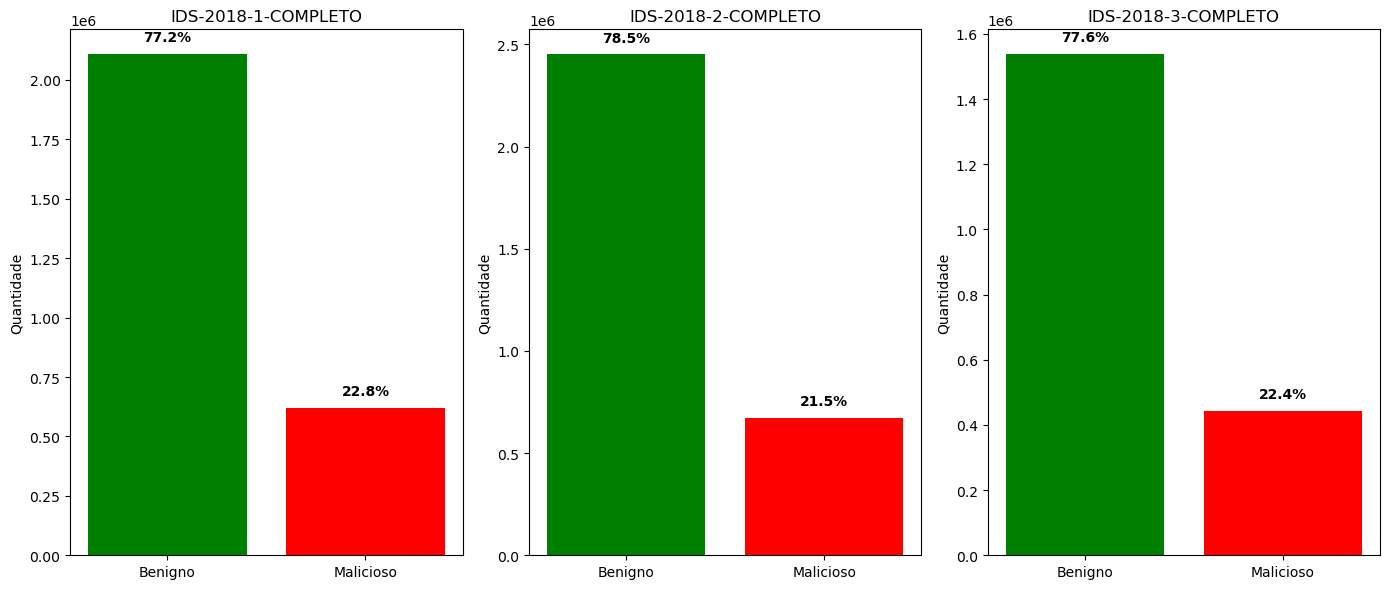

In [43]:
plt.figure(figsize=(14, 6))

for i, (nome, df) in enumerate(dados.items(), start=1):
    contagem_ataques = df['Tipos de Ataques'].value_counts()
    benigno = contagem_ataques.get('Benign', 0)
    malicioso = contagem_ataques.sum() - benigno  
    total = benigno + malicioso  

    plt.subplot(1, 3, i)  
    plt.bar(['Benigno', 'Malicioso'], [benigno, malicioso], color=["green", "red"])
    
    plt.title(f"{nome}")
    plt.ylabel("Quantidade")

    for j, valor in enumerate([benigno, malicioso]):
        porcentagem = (valor / total) * 100
        plt.text(j, valor + total * 0.02, f'{porcentagem:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

#### Tratamento de colunas - Parte 2

In [45]:
# Para colunas que devem ser 'int64'
cols_int64 = [
    'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
    'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
    'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Flow IAT Max', 'Flow IAT Min',
    'Fwd IAT Tot', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Max',
    'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
    'Fwd Header Len', 'Bwd Header Len', 'Pkt Len Min', 'Pkt Len Max', 'FIN Flag Cnt',
    'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
    'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
    'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg',
    'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
    'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min',
    'Active Max', 'Active Min', 'Idle Max', 'Idle Min'
]

df_2018_1[cols_int64] = df_2018_1[cols_int64].astype('int64')
df_2018_3[cols_int64] = df_2018_3[cols_int64].astype('int64')

In [46]:
df_2018_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770089 entries, 0 to 3097148
Data columns (total 79 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int64  
 1   Protocol           int64  
 2   Flow Duration      int64  
 3   Tot Fwd Pkts       int64  
 4   Tot Bwd Pkts       int64  
 5   TotLen Fwd Pkts    int64  
 6   TotLen Bwd Pkts    int64  
 7   Fwd Pkt Len Max    int64  
 8   Fwd Pkt Len Min    int64  
 9   Fwd Pkt Len Mean   float64
 10  Fwd Pkt Len Std    float64
 11  Bwd Pkt Len Max    int64  
 12  Bwd Pkt Len Min    int64  
 13  Bwd Pkt Len Mean   float64
 14  Bwd Pkt Len Std    float64
 15  Flow Byts/s        float64
 16  Flow Pkts/s        float64
 17  Flow IAT Mean      float64
 18  Flow IAT Std       float64
 19  Flow IAT Max       int64  
 20  Flow IAT Min       int64  
 21  Fwd IAT Tot        int64  
 22  Fwd IAT Mean       float64
 23  Fwd IAT Std        float64
 24  Fwd IAT Max        int64  
 25  Fwd IAT Min        int6

In [49]:
df_2018_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1981125 entries, 0 to 1992803
Data columns (total 79 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int64  
 1   Protocol           int64  
 2   Flow Duration      int64  
 3   Tot Fwd Pkts       int64  
 4   Tot Bwd Pkts       int64  
 5   TotLen Fwd Pkts    int64  
 6   TotLen Bwd Pkts    int64  
 7   Fwd Pkt Len Max    int64  
 8   Fwd Pkt Len Min    int64  
 9   Fwd Pkt Len Mean   float64
 10  Fwd Pkt Len Std    float64
 11  Bwd Pkt Len Max    int64  
 12  Bwd Pkt Len Min    int64  
 13  Bwd Pkt Len Mean   float64
 14  Bwd Pkt Len Std    float64
 15  Flow Byts/s        float64
 16  Flow Pkts/s        float64
 17  Flow IAT Mean      float64
 18  Flow IAT Std       float64
 19  Flow IAT Max       int64  
 20  Flow IAT Min       int64  
 21  Fwd IAT Tot        int64  
 22  Fwd IAT Mean       float64
 23  Fwd IAT Std        float64
 24  Fwd IAT Max        int64  
 25  Fwd IAT Min        int6

In [51]:
#Caminho de saída para o novo arquivo CSV após tratamento de nulos, duplicados e coluna categórica
novo_path_2018_1_saida = r"C:\Users\augus\Capstone-Data-Science-Project\dados\processados\IDS-2018-1-PROCESSADO.csv"
novo_path_2018_2_saida = r"C:\Users\augus\Capstone-Data-Science-Project\dados\processados\IDS-2018-2-PROCESSADO.csv"
novo_path_2018_3_saida = r"C:\Users\augus\Capstone-Data-Science-Project\dados\processados\IDS-2018-3-PROCESSADO.csv"

#Salvando o arquivo
df_2018_1.to_csv(novo_path_2018_1_saida, index=False)
df_2018_2.to_csv(novo_path_2018_2_saida, index=False)
df_2018_3.to_csv(novo_path_2018_3_saida, index=False)

print(f'Arquivo salvo em:\n{novo_path_2018_1_saida}\n{novo_path_2018_2_saida}\n{novo_path_2018_3_saida}')

Arquivo salvo em:
C:\Users\augus\Capstone-Data-Science-Project\dados\processados\IDS-2018-1-PROCESSADO.csv
C:\Users\augus\Capstone-Data-Science-Project\dados\processados\IDS-2018-2-PROCESSADO.csv
C:\Users\augus\Capstone-Data-Science-Project\dados\processados\IDS-2018-3-PROCESSADO.csv
